**1. Importing the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2. Load the Dataset**

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", error_bad_lines = False)

C:\Users\gusai\AppData\Local\Temp\ipykernel_18564\4184977821.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", error_bad_lines = False)


In [5]:
df.head(5)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.set_index("Month", inplace = True)

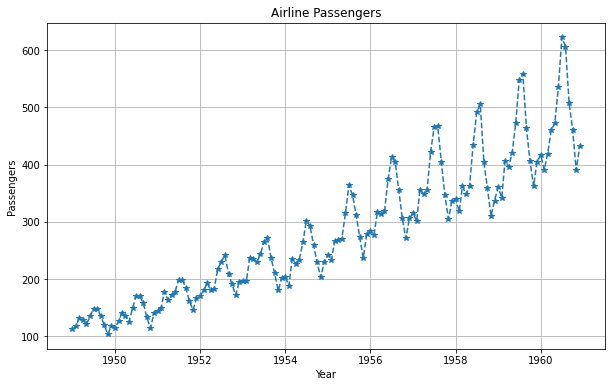

In [16]:
# Plotting the number of Passengers for every month of the year
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.Passengers, '--', marker = "*", )
plt.grid()
plt.title("Airline Passengers")
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

 Handling the Missing Values

In [8]:
df.isnull().sum()

Passengers    0
dtype: int64

In [39]:
# Fill the NULL values: Interpolation - Backward Fill
df_copy_LIB = df_copy.interpolate(method = "linear", limit_direction='backward')

In [40]:
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

In [41]:
# Resampling
# Fill the NULL values: Downsample to quaterly data points (3 Months)
df_quaterly = df.resample('3M').mean()

In [42]:
df_quaterly

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333
1950-04-30,134.000000
1950-07-31,148.000000
1950-10-31,153.666667
1951-01-31,133.000000


In [43]:
df_quaterly.size

49

In [44]:
df_quaterly.isnull().any()

Passengers    False
dtype: bool

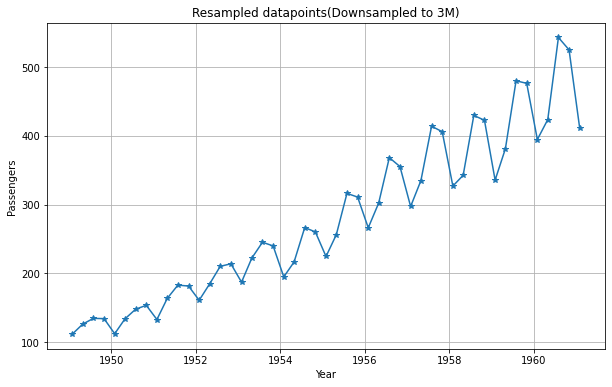

In [45]:
plt.figure(figsize = (10, 6))
plt.plot(df_quaterly.index, df_quaterly.Passengers, '-', marker='*')
plt.grid()
plt.xlabel('Year')
plt.title("Resampled datapoints(Downsampled to 3M)")
plt.ylabel('Passengers')
plt.show()

**3.2** Time Series **E**xploratory **D**ata **A**nalysis

In [12]:
import statsmodels.api as sm
from pylab import rcParams

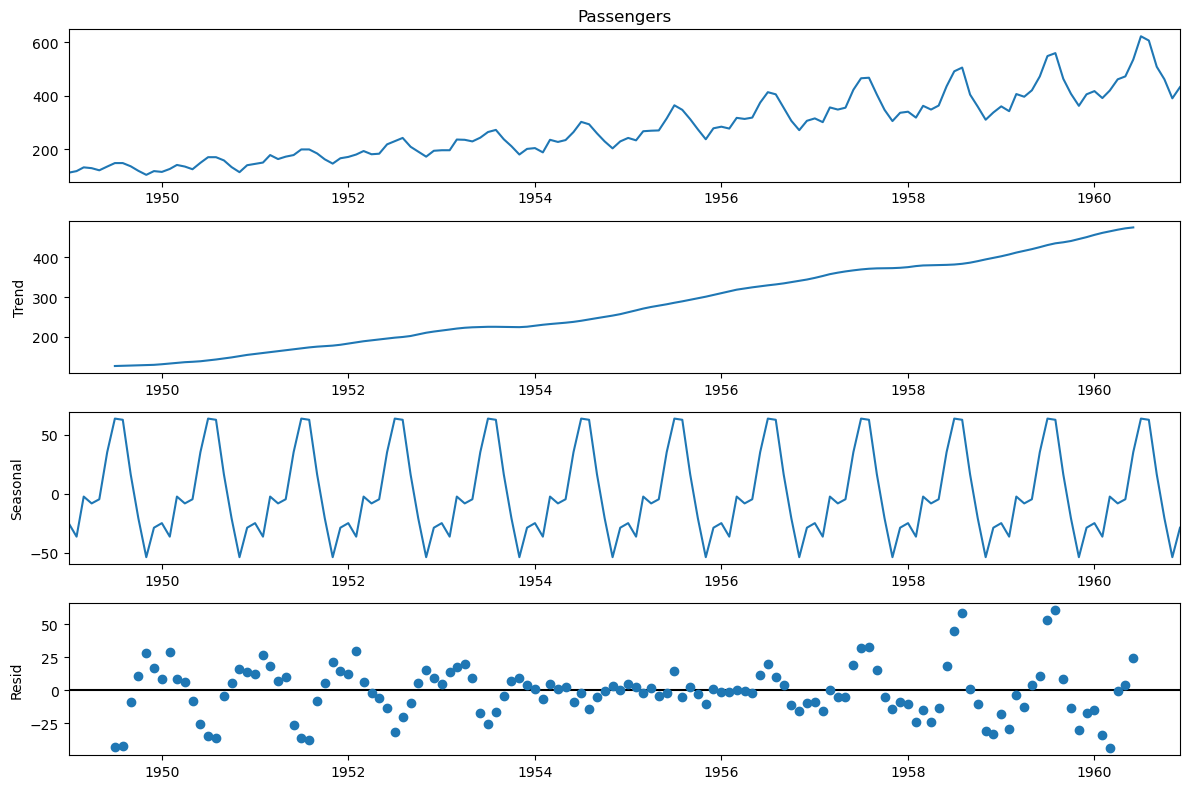

In [13]:
rcParams['figure.figsize'] = 12, 8
# A object with seasonal, trend, and resid attributes
# Y[t] = T[t] + S[t] + e[t]
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model = 'additive')
decompose_series.plot()
plt.show()

**3.3** Convert time series into stationary by removing trend and seasonality

In [92]:
df_log = np.log(df)

In [94]:
df_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [95]:
# Differencing
df_diff = df_log.diff(periods = 1)

In [96]:
# Calculating the difference from its previous value, periods=1 (default) is the difference from its previous value
df_diff

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [97]:
df_diff.rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [98]:
df_diff.rolling(12).mean()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.006728
1960-09-01,0.007730
1960-10-01,0.010382


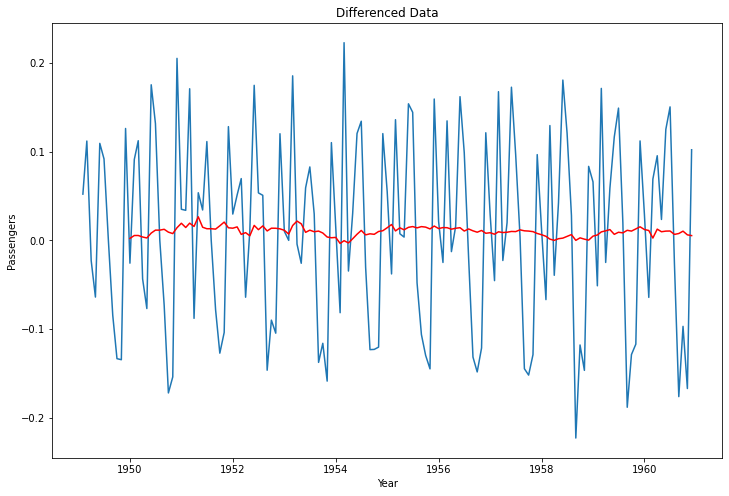

In [99]:
plt.figure(figsize=(12, 8))
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.title("Differenced Data")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.plot(df_diff.rolling(12).mean(), color='red')
plt.show()

**4. Time Series Forecasting using Stochastic Models**

In [101]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [103]:
df_diff['Passengers']

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: Passengers, Length: 144, dtype: float64

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

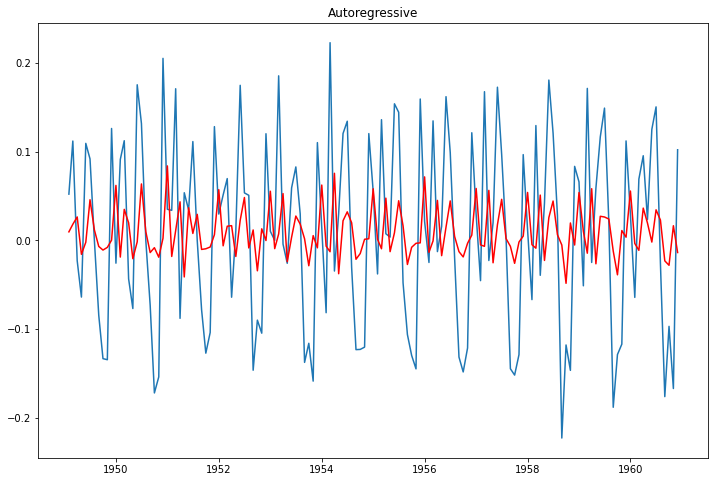

In [112]:
from statsmodels.tsa.arima_model import ARIMA
AR_model = ARIMA(df_diff, order=(2, 0, 0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.title("Autoregressive")
plt.plot(AR_model_results.fittedvalues, color = 'red')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


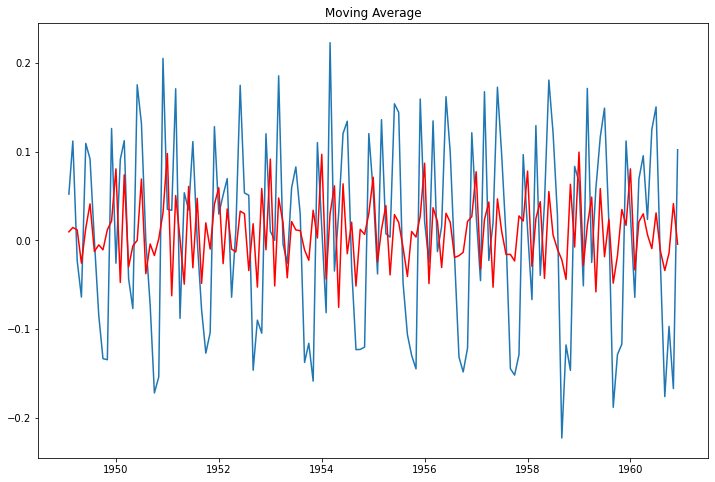

In [113]:
# Moving Average
MA_model = ARIMA(df_diff, order = (0, 0, 2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.title("Moving Average")
plt.plot(MA_model_results.fittedvalues, color='red')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


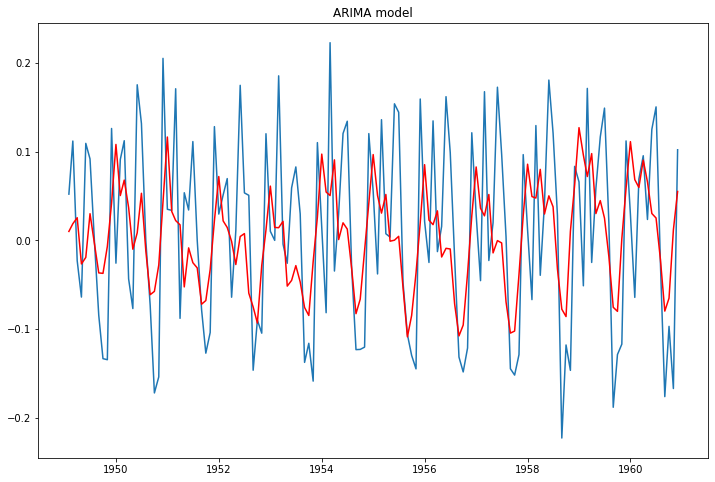

In [114]:
# ARIMA model
ARIMA_model = ARIMA(df_diff, order=(2, 0, 1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.title("ARIMA model")
plt.plot(ARIMA_results.fittedvalues, color="red")